### Business Problem
An e-commerce company wants to segment its customers and determine marketing strategies according to these segments.

For this purpose, we will define the behavior of customers and we will form groups according to clustering.

### Column Descriptors
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. <br>
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. <br>
Description: Product (item) name. Nominal. <br>
Quantity: The quantities of each product (item) per transaction. Numeric. <br>
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. <br>
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). <br>
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. <br>
Country: Country name. Nominal. The name of the country where a customer resides. <br>

### 1. Load the dataset

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [255]:
# load dataset

df = pd.read_csv('C:/Users/vumac/Desktop/Springboard_Capstone3/Dataset/online_retail_cleaned.csv', encoding= 'unicode_escape', index_col=0)

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390263 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      390263 non-null  int64  
 1   StockCode    390263 non-null  object 
 2   Description  390263 non-null  object 
 3   Quantity     390263 non-null  int64  
 4   InvoiceDate  390263 non-null  object 
 5   Price        390263 non-null  float64
 6   Customer ID  390263 non-null  float64
 7   Country      390263 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 26.8+ MB


In [257]:
df.shape

(390263, 8)

In [258]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom


In [259]:
# Create a 'Revenue' column

df["Revenue"] = df["Quantity"]*df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [260]:
# Summary Statistics

df[['Quantity', 'Price', 'Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,390263.0,9.911706,14.581874,1.000,2.00,6.00,12.00,120.00
Price,390263.0,2.726508,2.541146,0.001,1.25,1.95,3.75,14.96
Revenue,390263.0,17.732115,30.440778,0.001,4.55,11.25,18.72,1314.00


### 2. Products

In [310]:
# Total number of Products, Customers and Invoices

print('total number of products is {}'.format(df.StockCode.nunique()))

total number of products is 3626


#### Which product is the most ordered?

Text(0, 0.5, 'Product')

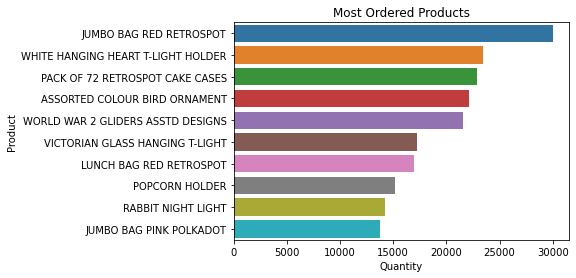

In [262]:
# Top 10 most ordered products

most_ordered = df.groupby("Description")['Quantity'].sum().sort_values(ascending = False).reset_index()
sns.barplot(data=most_ordered.head(10), y='Description', x='Quantity');
plt.title('Most Ordered Products');
plt.ylabel('Product')

#### Which are the most expensive products?¶


In [263]:
# The most expensive products were $14.95. 
# There were many products set at this price. 

df.groupby('Description')['Price'].mean().sort_values(ascending=False).head(10)

Description
BREAD BIN, DINER STYLE, IVORY          14.95
BREAD BIN, DINER STYLE, MINT           14.95
GLASS CAKE COVER AND PLATE             14.95
SILVER CHRISTMAS TREE BAUBLE STAND     14.95
CHEST OF DRAWERS GINGHAM HEART         14.95
STEEL SWEETHEART ROUND TABLE CREAM     14.95
I LOVE LONDON BABY GIFT SET            14.95
ELEPHANT CARNIVAL POUFFE               14.95
CIRCUS PARADE BABY GIFT SET            14.95
 SPACEBOY BABY GIFT SET                14.95
Name: Price, dtype: float64

#### Products generated the most revenue

In [264]:
df.groupby('Description')['Revenue'].sum().sort_values(ascending=False)

Description
REGENCY CAKESTAND 3 TIER              129122.350
WHITE HANGING HEART T-LIGHT HOLDER     64039.110
PARTY BUNTING                          61166.830
JUMBO BAG RED RETROSPOT                56880.880
ASSORTED COLOUR BIRD ORNAMENT          37428.740
                                         ...    
VINTAGE BLUE TINSEL REEL                   0.840
SET 12 COLOURING PENCILS DOILEY            0.650
HEN HOUSE W CHICK IN NEST                  0.420
PADS TO MATCH ALL CUSHIONS                 0.003
Bank Charges                               0.001
Name: Revenue, Length: 3832, dtype: float64

### 3. Revenue

#### Average revenue per invoice

In [265]:
# Average revenue earned on each invoice

rev_per_inv = df.groupby("Invoice")['Revenue'].sum()
print('Average revenue earned on each invoice is {:.2f}'.format(rev_per_inv.mean()))

Average revenue earned on each invoice is 384.88


In [266]:
# 50% of the invoices earned between $149 to $436

rev_per_inv.describe([0.01,0.25,0.50,0.75,0.99])

count    17980.000000
mean       384.882563
std        527.129127
min          0.001000
1%           8.250000
25%        149.020000
50%        285.020000
75%        436.575000
99%       2342.345300
max      13694.330000
Name: Revenue, dtype: float64

#### Average revenue per customers

In [267]:
# Average revenue earned per customers

rev_per_cust = df.groupby("Customer ID")['Revenue'].sum()
print('Average revenue earned per customers is {:.2f}'.format(rev_per_cust.mean()))

Average revenue earned per customers is 1613.10


In [268]:
# Majority of customers ordered between $290 to $1,550 per year.

rev_per_cust.describe([0.01,0.25,0.50,0.75,0.99])

count      4290.000000
mean       1613.097549
std        4820.714957
min           2.900000
1%           41.998900
25%         290.210000
50%         637.695000
75%        1547.890000
99%       13247.250500
max      158967.800000
Name: Revenue, dtype: float64

#### Revenue per countries

UK revenue percentage is 82.92%


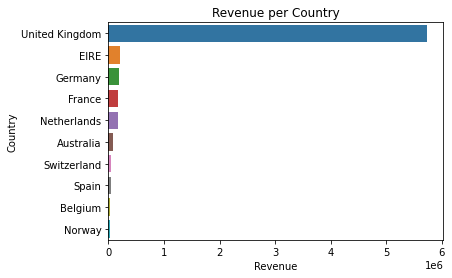

In [269]:
# Countries with the most revenue earned

rev_per_countries = df.groupby("Country")['Revenue'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=rev_per_countries.head(10), y='Country', x='Revenue');
plt.title('Revenue per Country');
plt.ylabel('Country');

UK_rev = rev_per_countries.loc[rev_per_countries['Country']=='United Kingdom', 'Revenue'] / rev_per_countries['Revenue'].sum()
print('UK revenue percentage is {:.2f}%'.format(UK_rev.values[0]*100))

### 4. Explore relationships between features

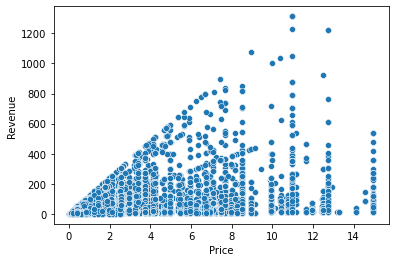

In [317]:
# It seems like products with prices from $4 to $12 can generate higer revenue

sns.scatterplot(x=df.Price, y=df.Revenue);

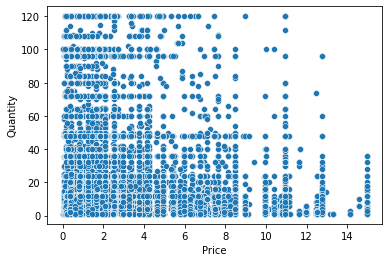

In [318]:
# The lower the price of a product, the more quantity that product was ordered

sns.scatterplot(x=df.Price, y=df.Quantity);

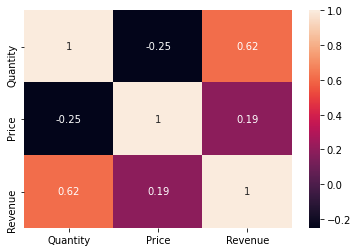

In [319]:
# As seen from the above scatter plot
# Price has negative correlation with Quantity ordered
# Price has positive correlation with Revenue

sns.heatmap(df[['Quantity', 'Price', 'Revenue']].corr(), annot=True);